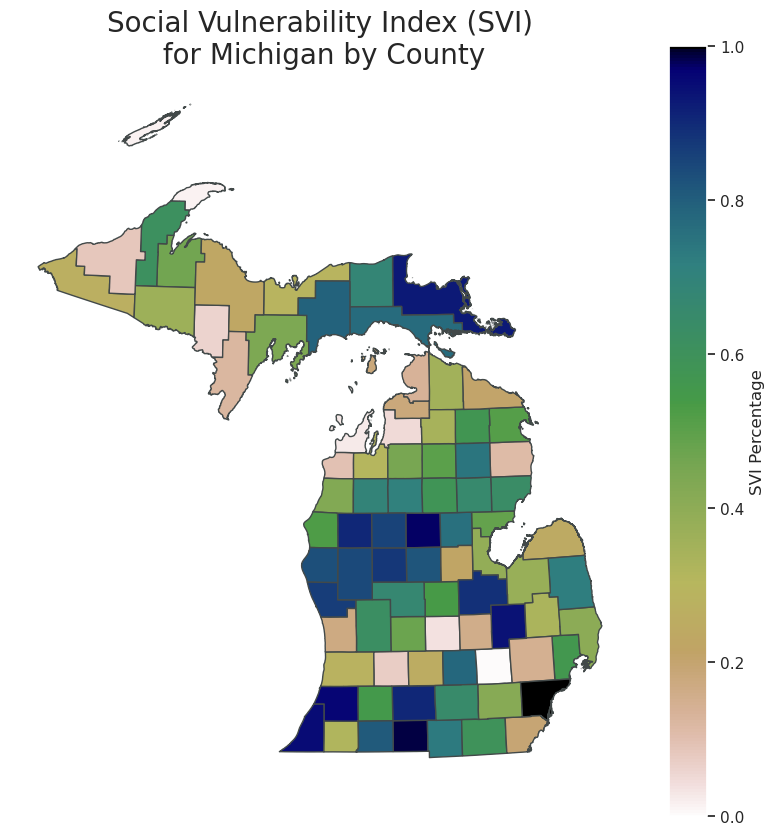

In [69]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import shapely
from matplotlib.colors import LinearSegmentedColormap 
import cartopy.crs as ccrs
import metpy as mp
from metpy.plots import USCOUNTIES
import seaborn as sns

# Apply the default theme
sns.set_theme()
# Load Michigan county shapefile
mi_counties = gpd.read_file("/home/central/majes1ce/notebooks/Climate Project/County.shp") 
dbf = gpd.read_file("/home/central/majes1ce/notebooks/Climate Project/County.dbf")

#med_SVI = int(69183) #none of the county incomes are greater by more than 25k

#Save the updated DataFrame back to an Excel file
df=pd.read_excel('/home/central/majes1ce/notebooks/Climate Project/svi_interactive_map.xlsx')
df.rename(columns={'COUNTY': 'Label'}, inplace=True)
df.to_excel("updated_excel_file_svi.xlsx", index=False)
specific_columns = ['Label','RPL_THEMES']
df=pd.read_excel('updated_excel_file_svi.xlsx', usecols=specific_columns)

df['RPL_THEMES']=df['RPL_THEMES'].astype(float)
df['Label']=df['Label'].astype(str)

merged_map_2=dbf.merge(df, on='Label')

merged_map_2['RPL_THEMES']=(merged_map_2['RPL_THEMES'])

palatte=sns.color_palette("gist_earth_r", as_cmap=True)
plt.rcParams['axes.facecolor'] = 'none'
merged_map_2.plot(column='RPL_THEMES',edgecolor="#424949", cmap=palatte,figsize=(10,10),legend=True,legend_kwds={'label': "SVI Percentage"})
plt.title(f"Social Vulnerability Index (SVI)\n for Michigan by County", fontsize=20)
plt.gca().set_xticks([])  # Turn off x-axis labels
plt.gca().set_yticks([])  # Turn off y-axis labels
plt.savefig('SVI_map.png')
plt.show()